In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
f_birth = pd.read_csv(r'C:\Users\lifeon\Desktop\dataset\daily-total-female-births-CA.csv',index_col=[0], parse_dates=[0])

In [37]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [38]:
type(f_birth)

pandas.core.frame.DataFrame

In [39]:
series_value = f_birth.values

In [40]:
type(series_value)

numpy.ndarray

In [41]:
f_birth.size

365

In [42]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [43]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [20]:
f_birth = f_birth[0:365]

In [44]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


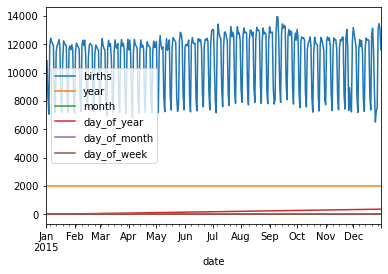

In [33]:
f_birth.plot()

In [50]:
#for smoothing the series
f_birth_mean = f_birth.rolling(window = 30).mean()

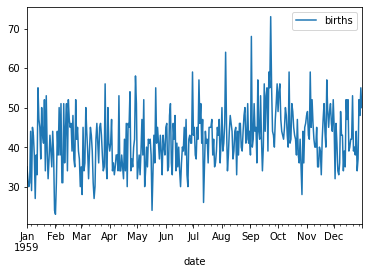

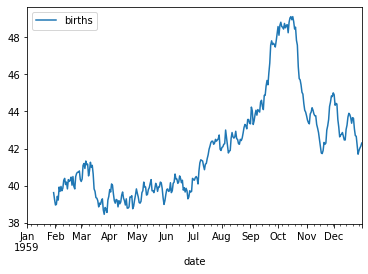

In [51]:
f_birth.plot()
f_birth_mean.plot()

In [53]:
value = pd.DataFrame(series_value)

In [54]:
birth_df = pd.concat([value, value.shift(1)],axis=1)

In [55]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [56]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']

In [57]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [60]:
birth_test = birth_df[1:]

In [62]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [65]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [63]:
birth_error = mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [64]:
birth_error

84.22252747252747

In [66]:
np.sqrt(birth_error)

9.177283229394606

In [68]:
#ARIMA -  Autoregressive (p) Integrated (d) Moving Average (q)

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

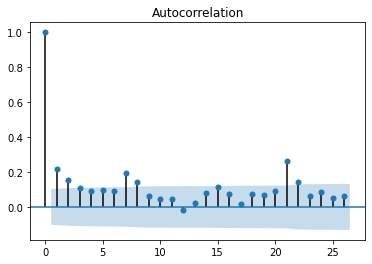

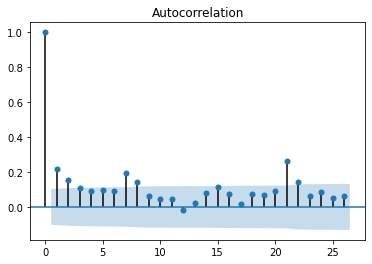

In [71]:
#plot_acf is to identify parameter Q
#ARIMA (p,d,q)
plot_acf(f_birth)

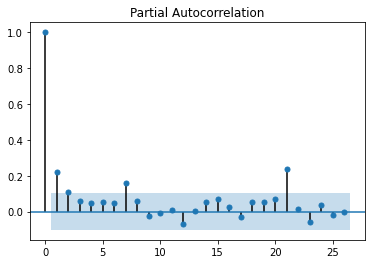

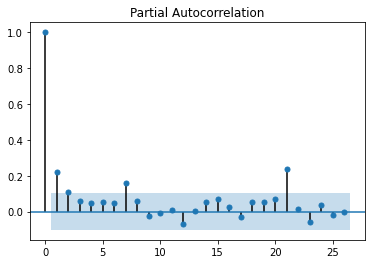

In [72]:
plot_pacf(f_birth) # to identify the value of p

In [73]:
# p = 2,3 d=0, & q = 3,4

f_birth.size

365

In [74]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [76]:
birth_train.size

330

In [77]:
birth_test.size

35

In [78]:
from statsmodels.tsa.arima_model import ARIMA

In [158]:
birth_model = ARIMA(birth_train, order = (3,1,3))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [159]:
birth_model_fit = birth_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [160]:
birth_model_fit.aic

2225.7995369478463

In [161]:
birth_forecast =  birth_model_fit.forecast(steps = 35)[0]

In [162]:
birth_forecast

array([44.60109682, 44.39775845, 44.97507914, 45.6551587 , 45.92067354,
       45.58733329, 44.92547413, 44.45179815, 44.53746385, 45.12876665,
       45.79052367, 46.03724637, 45.70009628, 45.05227577, 44.59977296,
       44.69771018, 45.28317523, 45.92551426, 46.15399285, 45.81354189,
       45.17975691, 44.74791152, 44.85748431, 45.43683649, 46.0600486 ,
       46.27091673, 45.92766037, 45.30789497, 44.89619506, 45.01678543,
       45.58976805, 46.19414929, 46.38802854, 46.04244229, 45.4366678 ])

In [163]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [164]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.734960824729373